# The goal is to divide customers into segments based on purchasing behavior, enabling targeted marketing

In [1]:
import pandas as pd

data = pd.read_excel("D:\\DATA ANALYTICS PROJECTS\\PYTHON PROJECTS\\Customer-Segmentation-using-Clustering-Algorithm\\online+retail\\Online Retail.xlsx")
data.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
# 1. Calculate Recency
from datetime import datetime

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
current_date = data['InvoiceDate'].max()
recency = data.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (current_date - x.max()).days)
).reset_index()

In [6]:
# 2. Calculate Frequency
frequency = data.groupby('CustomerID').agg(
    Frequency=('InvoiceNo', 'nunique')
).reset_index()

In [7]:
# 3. Calculate TotalSpend
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']
total_spend = data.groupby('CustomerID').agg(
    TotalSpend=('TotalSpend', 'sum')
).reset_index()

In [8]:
# 4. Merge all features into a single DataFrame
data_features = recency.merge(frequency, on='CustomerID').merge(total_spend, on='CustomerID')

In [9]:
# 5. Handle missing values by filling them with column means
data_features = data_features.fillna(data_features.mean())

In [10]:
# 6. Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features[['TotalSpend', 'Frequency', 'Recency']])

C:\Users\dashp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dashp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dashp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dashp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

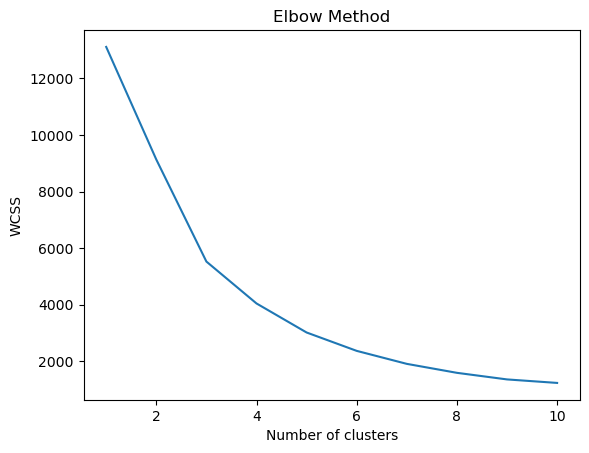

In [11]:
# 7. Apply KMeans Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
from sklearn.cluster import KMeans

# Set the optimal number of clusters from Elbow or Silhouette methods
optimal_k = 4  # Replace with the optimal K value you identified

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data_features['Cluster'] = clusters

# Inspect the first few rows to see the cluster assignments
data_features.head()


C:\Users\dashp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Recency,Frequency,TotalSpend,Cluster
0,12346.0,325,2,0.00,1
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


In [15]:
# Summarize characteristics per cluster
cluster_summary = data_features.groupby('Cluster').mean()
print(cluster_summary)

           CustomerID     Recency  Frequency     TotalSpend
Cluster                                                    
0        15285.392237   40.606500   4.802461    1478.515539
1        15357.643054  246.951242   1.805888     453.488888
2        15280.000000    6.666667  89.000000  182181.981667
3        15139.500000    8.181818  40.672727   18441.961455


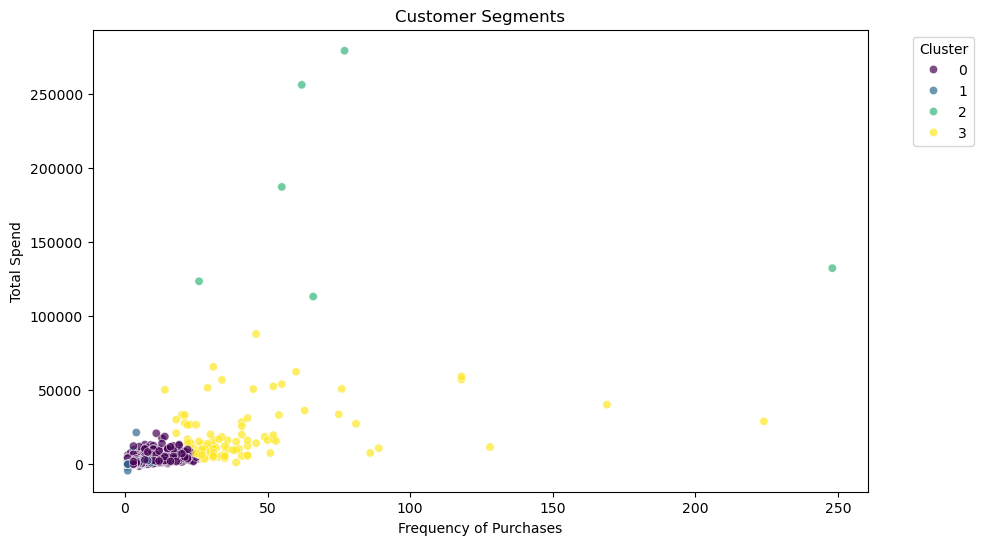

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='TotalSpend', hue='Cluster', data=data_features, palette='viridis', alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Total Spend')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\dashp\AppData\Local\Temp\ipykernel_16284\2532948522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalSpend', data=data_features, palette='Set2')


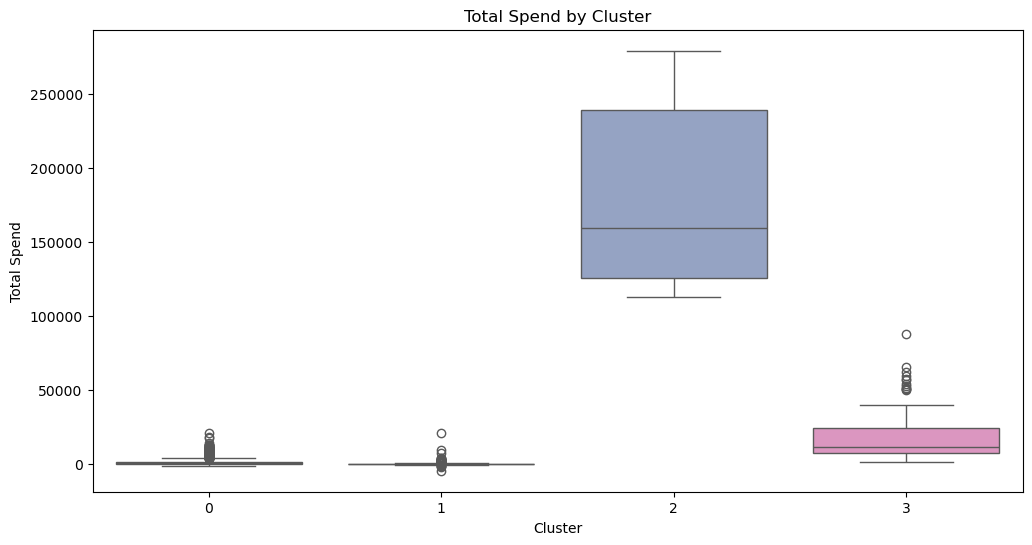

C:\Users\dashp\AppData\Local\Temp\ipykernel_16284\2532948522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Frequency', data=data_features, palette='Set2')


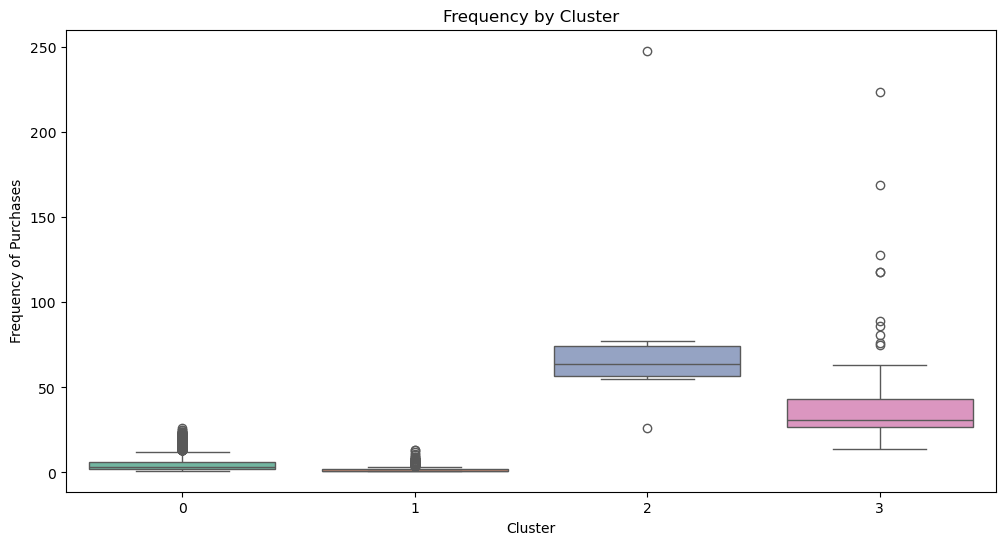

In [18]:
# Box plot for Total Spend by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='TotalSpend', data=data_features, palette='Set2')
plt.title('Total Spend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Spend')
plt.show()

# Box plot for Frequency by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Frequency', data=data_features, palette='Set2')
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency of Purchases')
plt.show()


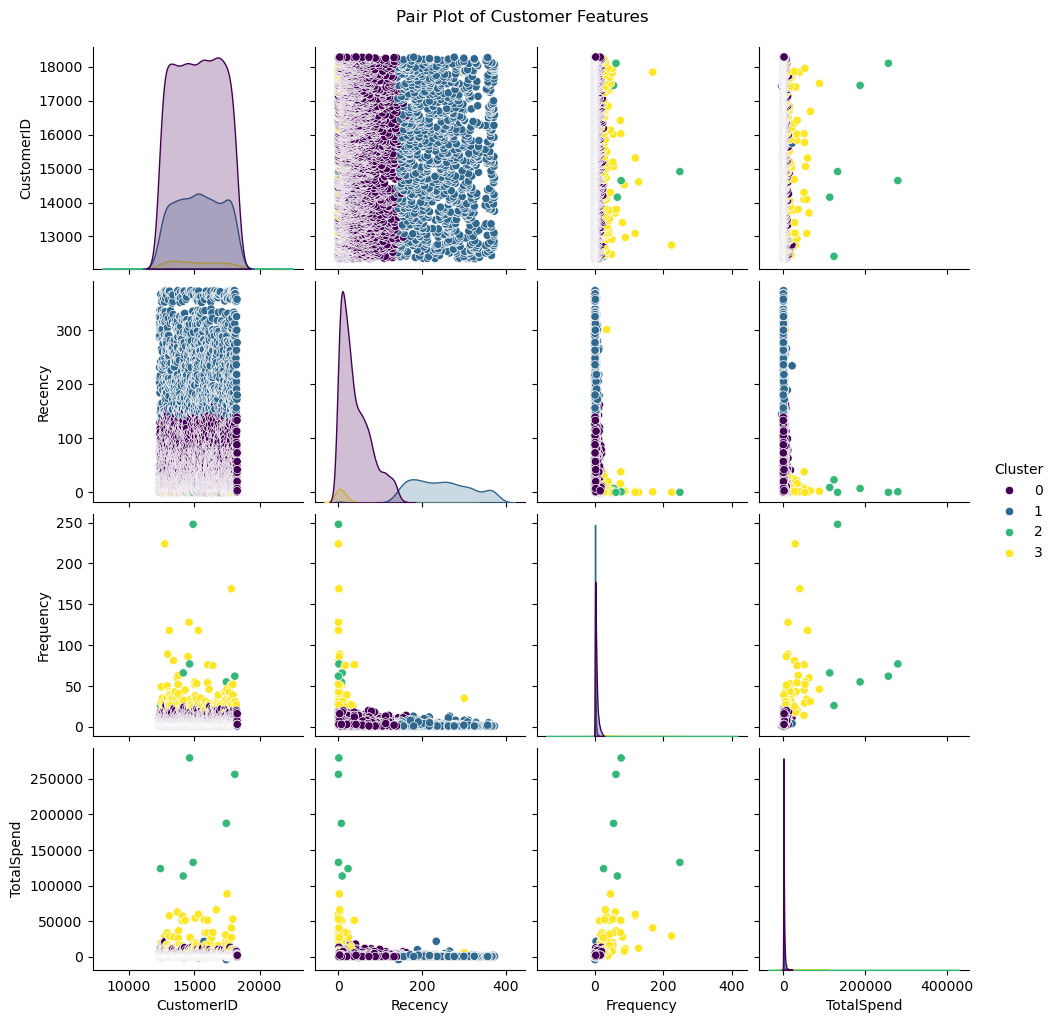

In [19]:
# Pair plot to visualize relationships between features colored by cluster
sns.pairplot(data_features, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

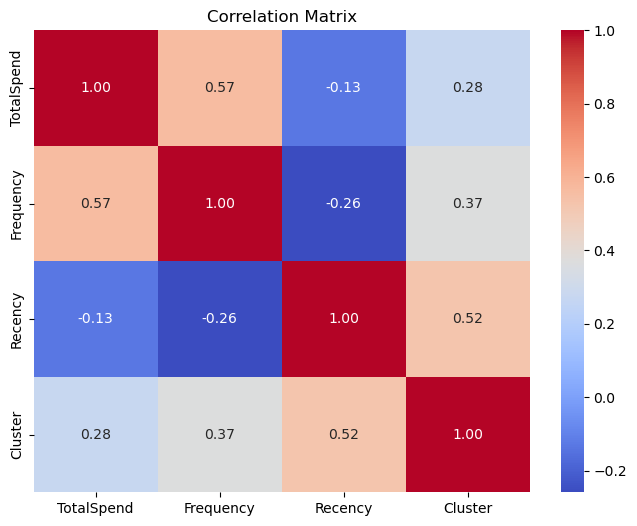

In [20]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = data_features[['TotalSpend', 'Frequency', 'Recency', 'Cluster']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\dashp\AppData\Local\Temp\ipykernel_16284\172878323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Cluster', data=data_features, palette='viridis')


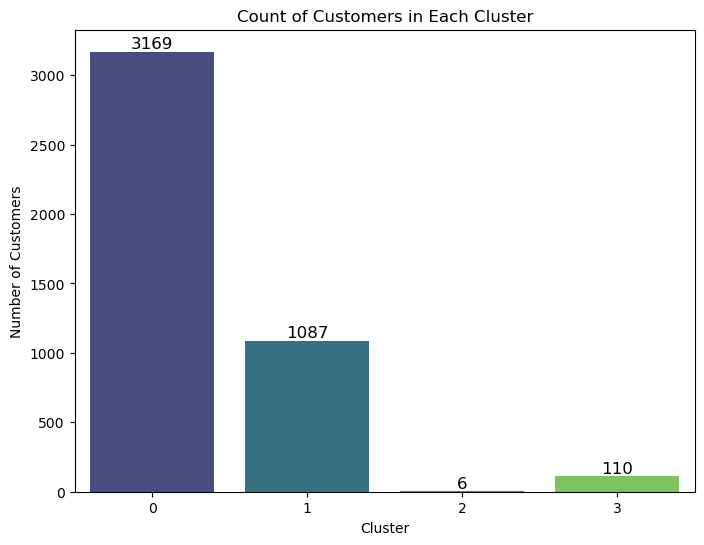

In [24]:
# Count plot of customers in each cluster
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Cluster', data=data_features, palette='viridis')

# Adding counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black')

plt.title('Count of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

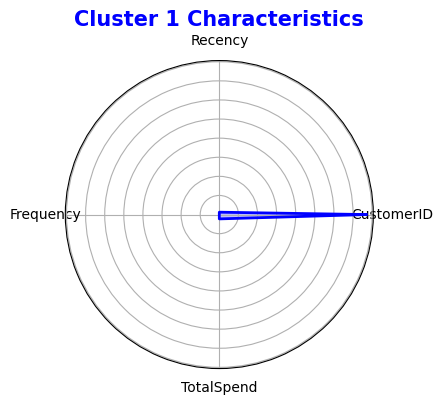

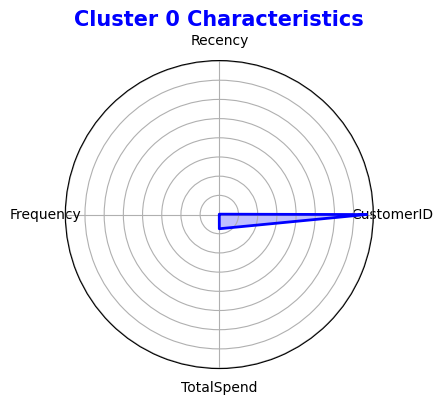

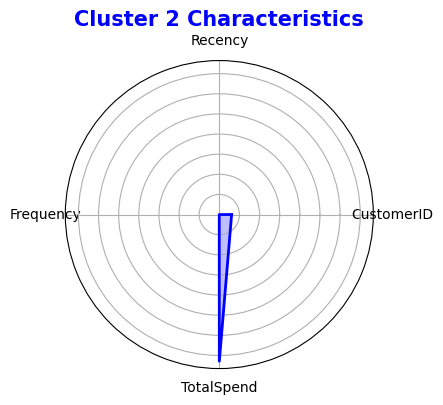

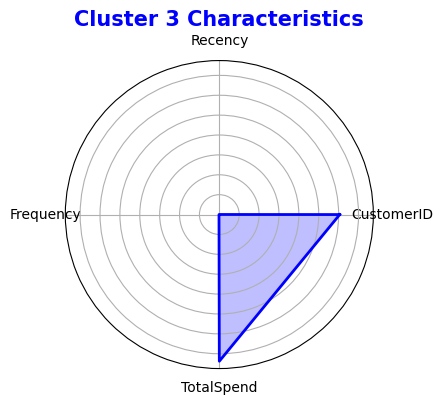

In [26]:
import numpy as np

# Function to create a radar chart
def create_radar_chart(data, title):
    labels = data.index  # Use index for labels since it's a Series
    stats = data.values.flatten().tolist()

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats += stats[:1]  # Repeat the first value to close the circle
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
    ax.fill(angles, stats, color='blue', alpha=0.25)
    ax.plot(angles, stats, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(title, size=15, color='blue', weight='bold')
    plt.show()

# Create radar charts for each cluster
for cluster in data_features['Cluster'].unique():
    cluster_data = data_features[data_features['Cluster'] == cluster].mean().drop('Cluster')
    create_radar_chart(cluster_data, f'Cluster {cluster} Characteristics')


# INDEPTH ANALYSIS

In [27]:
# Analyze average TotalSpend and Frequency per cluster
average_spend_frequency = data_features.groupby('Cluster')[['TotalSpend', 'Frequency']].mean().reset_index()
print(average_spend_frequency)

   Cluster     TotalSpend  Frequency
0        0    1478.515539   4.802461
1        1     453.488888   1.805888
2        2  182181.981667  89.000000
3        3   18441.961455  40.672727


   Cluster  HighValueCount
0        2               6
1        3               1


C:\Users\dashp\AppData\Local\Temp\ipykernel_16284\963702044.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=high_value_customers, palette='viridis')


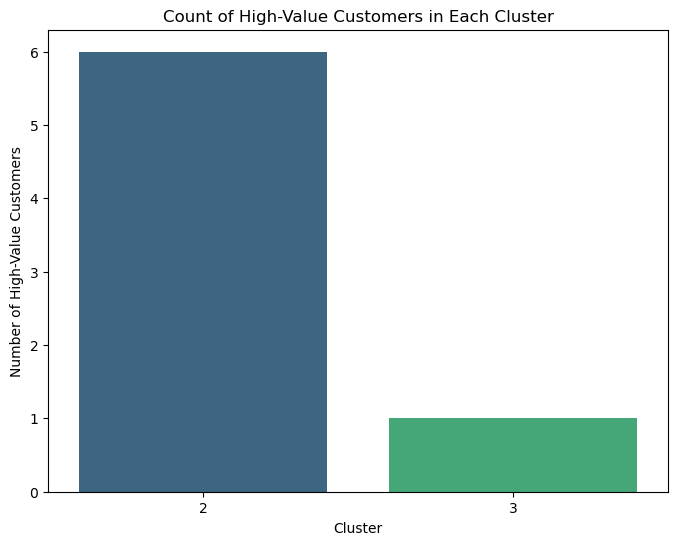

In [28]:
# Define high-value customers (e.g., Top 20% of spenders in each cluster)
threshold = average_spend_frequency['TotalSpend'].quantile(0.8)
high_value_customers = data_features[data_features['TotalSpend'] > threshold]

# Count of high-value customers per cluster
high_value_summary = high_value_customers.groupby('Cluster').size().reset_index(name='HighValueCount')
print(high_value_summary)

# Visualize high-value customers in clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=high_value_customers, palette='viridis')
plt.title('Count of High-Value Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of High-Value Customers')
plt.show()

   Cluster  LoyalCount
0        2           4
1        3          11


C:\Users\dashp\AppData\Local\Temp\ipykernel_16284\3694166478.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=loyal_customers, palette='viridis')


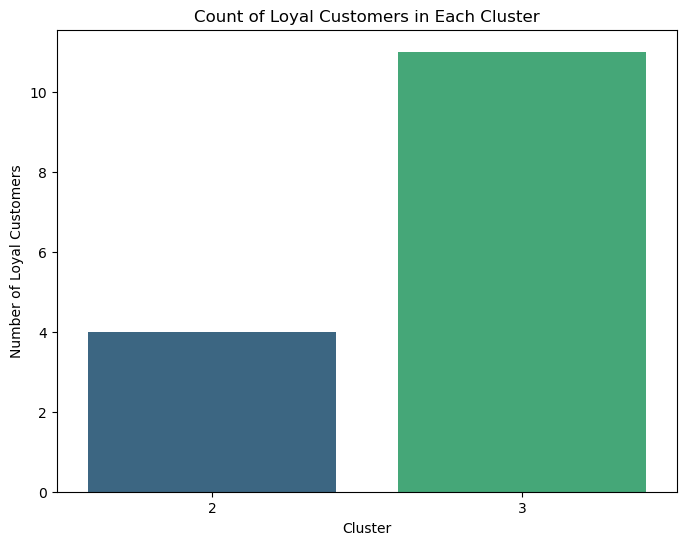

In [29]:
# Define loyal customers (e.g., Top 20% of frequent buyers in each cluster)
loyal_threshold = average_spend_frequency['Frequency'].quantile(0.8)
loyal_customers = data_features[data_features['Frequency'] > loyal_threshold]

# Count of loyal customers per cluster
loyal_summary = loyal_customers.groupby('Cluster').size().reset_index(name='LoyalCount')
print(loyal_summary)

# Visualize loyal customers in clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=loyal_customers, palette='viridis')
plt.title('Count of Loyal Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Loyal Customers')
plt.show()

In [31]:
print(average_spend_frequency.columns)

Index(['Cluster', 'TotalSpend', 'Frequency'], dtype='object')


In [33]:
# Analyze average TotalSpend, Frequency, and Recency per cluster
average_spend_frequency = data_features.groupby('Cluster')[['TotalSpend', 'Frequency', 'Recency']].mean().reset_index()
print(average_spend_frequency)

   Cluster     TotalSpend  Frequency     Recency
0        0    1478.515539   4.802461   40.606500
1        1     453.488888   1.805888  246.951242
2        2  182181.981667  89.000000    6.666667
3        3   18441.961455  40.672727    8.181818


   Cluster  AtRiskCount
0        0           82
1        1          993


C:\Users\dashp\AppData\Local\Temp\ipykernel_16284\2403153684.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=at_risk_customers, palette='viridis')


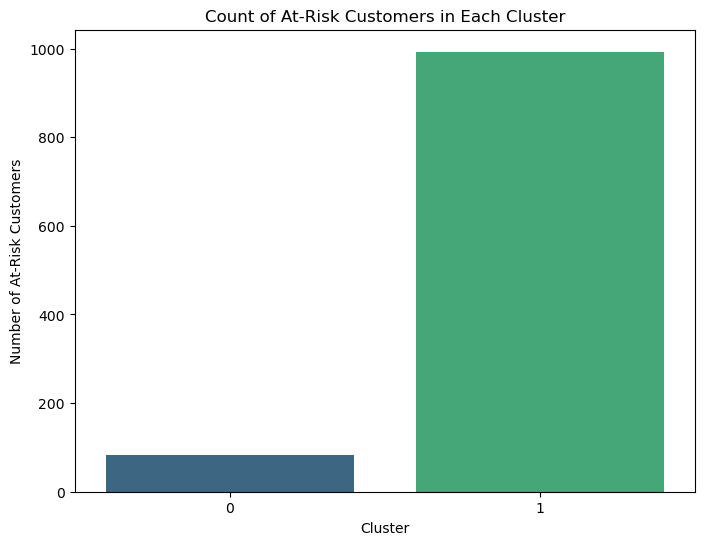

In [34]:
# Ensure Recency is included before defining at-risk customers
churn_threshold_frequency = average_spend_frequency['Frequency'].quantile(0.2)
churn_threshold_recency = average_spend_frequency['Recency'].quantile(0.8)

at_risk_customers = data_features[
    (data_features['Frequency'] < churn_threshold_frequency) &
    (data_features['Recency'] > churn_threshold_recency)
]

# Count of at-risk customers per cluster
at_risk_summary = at_risk_customers.groupby('Cluster').size().reset_index(name='AtRiskCount')
print(at_risk_summary)

# Visualize at-risk customers in clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=at_risk_customers, palette='viridis')
plt.title('Count of At-Risk Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of At-Risk Customers')
plt.show()

In [35]:
# Check the data_features DataFrame for Recency
print(data_features.head())

   CustomerID  Recency  Frequency  TotalSpend  Cluster
0     12346.0      325          2        0.00        1
1     12347.0        1          7     4310.00        0
2     12348.0       74          4     1797.24        0
3     12349.0       18          1     1757.55        0
4     12350.0      309          1      334.40        1


In [36]:
# Merge all summaries into a single DataFrame
summary = average_spend_frequency.merge(high_value_summary, on='Cluster', how='left') \
                                  .merge(loyal_summary, on='Cluster', how='left') \
                                  .merge(at_risk_summary, on='Cluster', how='left')

print(summary)

   Cluster     TotalSpend  Frequency     Recency  HighValueCount  LoyalCount  \
0        0    1478.515539   4.802461   40.606500             NaN         NaN   
1        1     453.488888   1.805888  246.951242             NaN         NaN   
2        2  182181.981667  89.000000    6.666667             6.0         4.0   
3        3   18441.961455  40.672727    8.181818             1.0        11.0   

   AtRiskCount  
0         82.0  
1        993.0  
2          NaN  
3          NaN  


In [37]:
# Fill NaN values with 0
summary.fillna(0, inplace=True)

print(summary)

   Cluster     TotalSpend  Frequency     Recency  HighValueCount  LoyalCount  \
0        0    1478.515539   4.802461   40.606500             0.0         0.0   
1        1     453.488888   1.805888  246.951242             0.0         0.0   
2        2  182181.981667  89.000000    6.666667             6.0         4.0   
3        3   18441.961455  40.672727    8.181818             1.0        11.0   

   AtRiskCount  
0         82.0  
1        993.0  
2          0.0  
3          0.0  


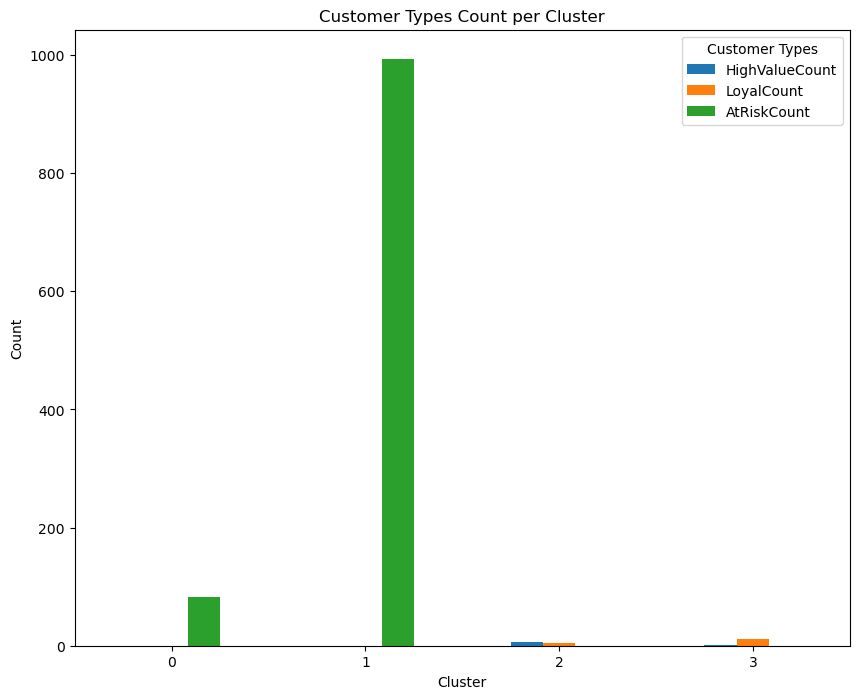

In [39]:
# Bar chart for High Value, Loyal, and At Risk Customers per Cluster
summary.set_index('Cluster')[['HighValueCount', 'LoyalCount', 'AtRiskCount']].plot(kind='bar', figsize=(10, 8))
plt.title('Customer Types Count per Cluster')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Customer Types')
plt.show()

In [41]:
# Assuming your clustered dataset is in the variable `data_features`
# Ensure 'Cluster' column is included in `data_features` DataFrame

# Export to CSV
data_features.to_csv('clustered_customers.csv', index=False)

print("Clustered dataset exported as 'clustered_customers.csv'")

Clustered dataset exported as 'clustered_customers.csv'
